In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from analysis import get_data
from analysis import read_log, read_logs
from analysis import generate_average

In [2]:
sizes = [100, 1000, 10000, 100000, 1000000, 10000000]

In [12]:
def plot_benchmark_by_size(df, size=None, tag=None, files=None, x="sizes", y="time"):
    names = "-".join(files)
    sns.lineplot(data=df, x=x, y=y, hue="name");
    t = tag.title()
    label = f"{t}".replace("_", " ")
    plt.title(f"{label}")
    if "time" in y: y = f"{y}/s"
    if "time" in x: x = f"{x}/s"
    plt.xlabel(x.capitalize())
    plt.ylabel(y.capitalize())
    plt.savefig(f"images/mpi-{tag}-{names}.png")
    plt.savefig(f"images/mpi-{tag}-{names}.pdf")

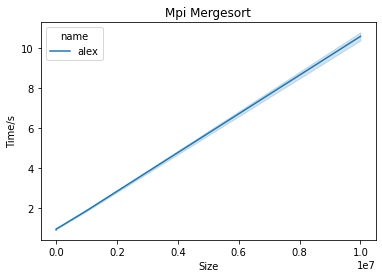

In [16]:
tag = "mpi_mergesort"
node = "2400MHz"
files = ["alex"]
data = []
for file in files:
    for size in sizes: 
        log = f'{tag}-{node}-{file}'
        _data = read_log(log, size=size, tag=tag)
        data = data + _data
# print(data)

df = pd.DataFrame(data=data,
                columns=["processes", "time", "size", "name", "tag"])
plot_benchmark_by_size(df, tag=tag, files=files, x="size", y="time")


In [17]:
print(data)

[[4, 0.916, 100, 'alex', 'mpi_mergesort'], [4, 0.905, 100, 'alex', 'mpi_mergesort'], [4, 0.917, 100, 'alex', 'mpi_mergesort'], [4, 0.917, 100, 'alex', 'mpi_mergesort'], [4, 0.915, 100, 'alex', 'mpi_mergesort'], [4, 0.92, 100, 'alex', 'mpi_mergesort'], [4, 0.923, 100, 'alex', 'mpi_mergesort'], [4, 0.921, 100, 'alex', 'mpi_mergesort'], [4, 0.925, 100, 'alex', 'mpi_mergesort'], [4, 0.932, 100, 'alex', 'mpi_mergesort'], [4, 0.931, 1000, 'alex', 'mpi_mergesort'], [4, 0.937, 1000, 'alex', 'mpi_mergesort'], [4, 0.926, 1000, 'alex', 'mpi_mergesort'], [4, 0.975, 1000, 'alex', 'mpi_mergesort'], [4, 0.959, 1000, 'alex', 'mpi_mergesort'], [4, 0.951, 1000, 'alex', 'mpi_mergesort'], [4, 0.974, 1000, 'alex', 'mpi_mergesort'], [4, 0.942, 1000, 'alex', 'mpi_mergesort'], [4, 0.992, 1000, 'alex', 'mpi_mergesort'], [4, 0.949, 1000, 'alex', 'mpi_mergesort'], [4, 0.967, 10000, 'alex', 'mpi_mergesort'], [4, 0.947, 10000, 'alex', 'mpi_mergesort'], [4, 0.948, 10000, 'alex', 'mpi_mergesort'], [4, 0.958, 10000, 

In [ ]:
def get_data(content, tag="mpi_mergesort", size=None):
    """
    TBD

    :param content: data output from running mergesort
    :type content: string
    :return: none
    :rtype: none
    """
    found = []
    lines = [line for line in content if "# csv" in line]

    for line in lines[1:]:
        entries = line.split(",")
        entry = [entries[a] for a in [1, 3, 9]]
        time = entry[1]
        name = entry[2]
        processors, size = entry[0].split(tag)[1].split("_")[1:]

        entry = [
            int(processors),
            # int(count),
            float(time),
            int(size),
            name,
            tag
        ]
        found.append(entry)
    return found